In [1]:
%matplotlib inline

import sys

sys.path.insert(0, "..")

import dask.array as da
import dask
import numpy as np
import pandas
from pyscenarios import sobol, clusterization, plot_couples, scramble

# Shared configuration
samples = 16383
dimensions = 6
rng_chunks = (-1, 1)
heat_chunks = (1024, -1)
heat_clip = (0.99, 1.01)
d0 = 10

## Mersenne Twister

Generate one plot for each unique combination of the cartesian product of all dimensions

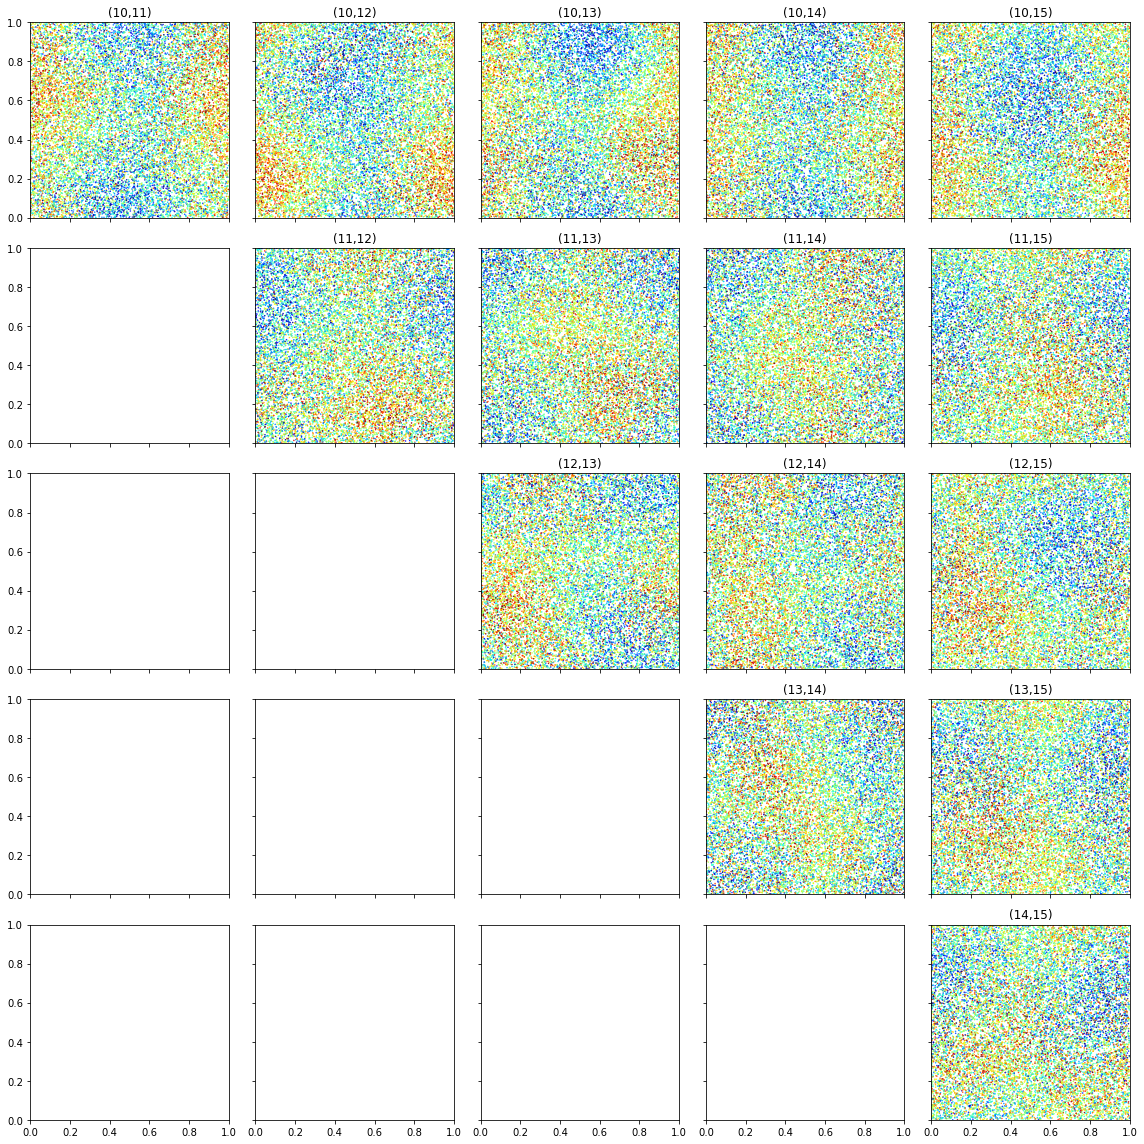

In [2]:
rng = da.random.RandomState(d0)
S1 = rng.random((samples, dimensions), chunks=rng_chunks)
H1 = clusterization(S1.rechunk(heat_chunks))
H1 = np.clip(H1, *heat_clip)
plot_couples(S1, heat=H1, d0=d0)

## Sobol

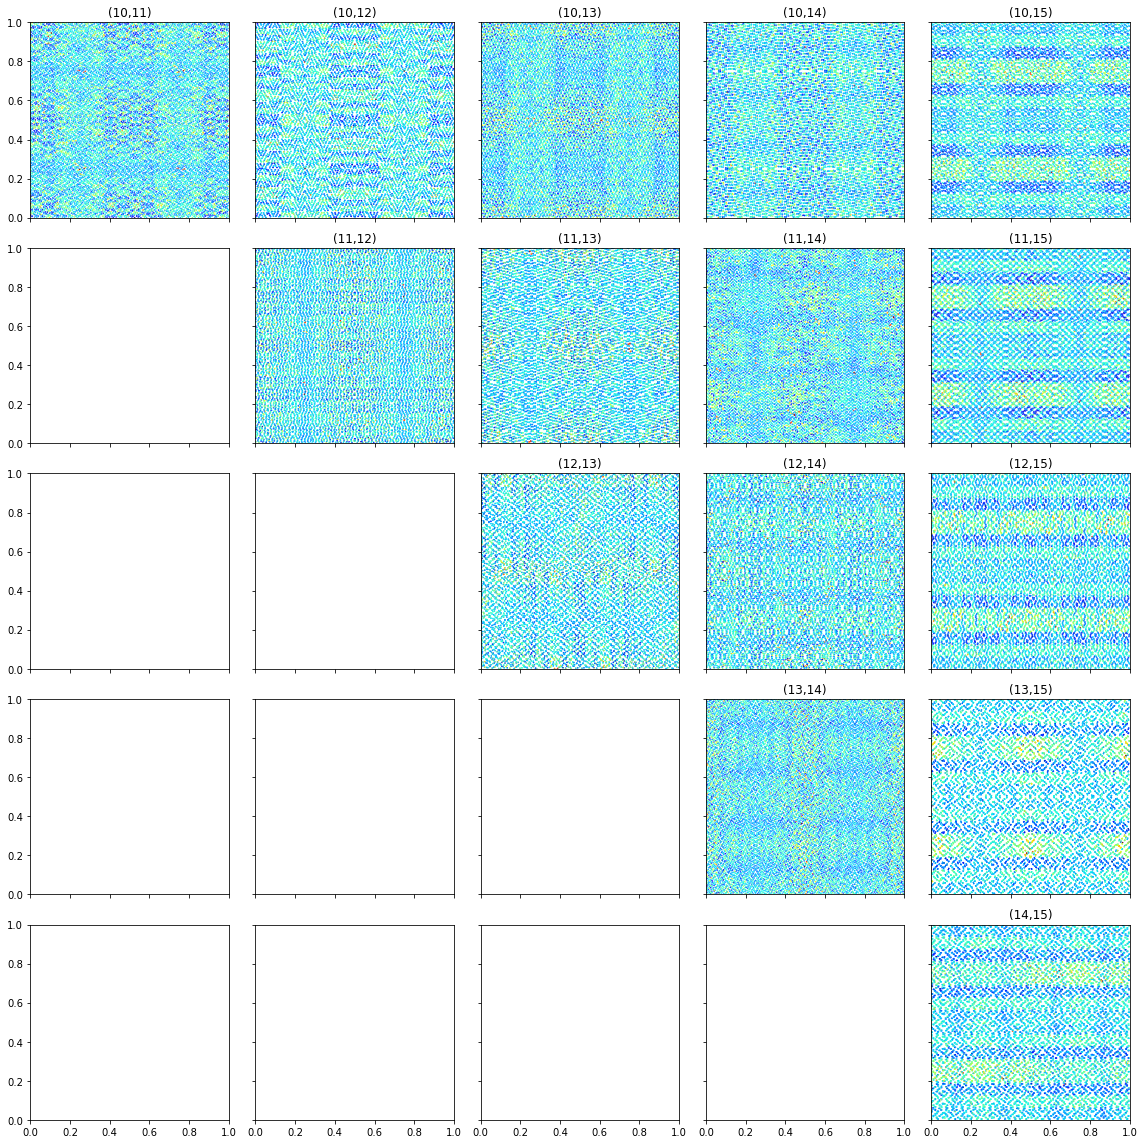

In [3]:
S2 = sobol((samples, dimensions), d0=d0, chunks=rng_chunks)
H2 = clusterization(S2.rechunk(heat_chunks))
H2 = np.clip(H2, *heat_clip)
plot_couples(S2, heat=H2, d0=d0)

# Scrambled Sobol

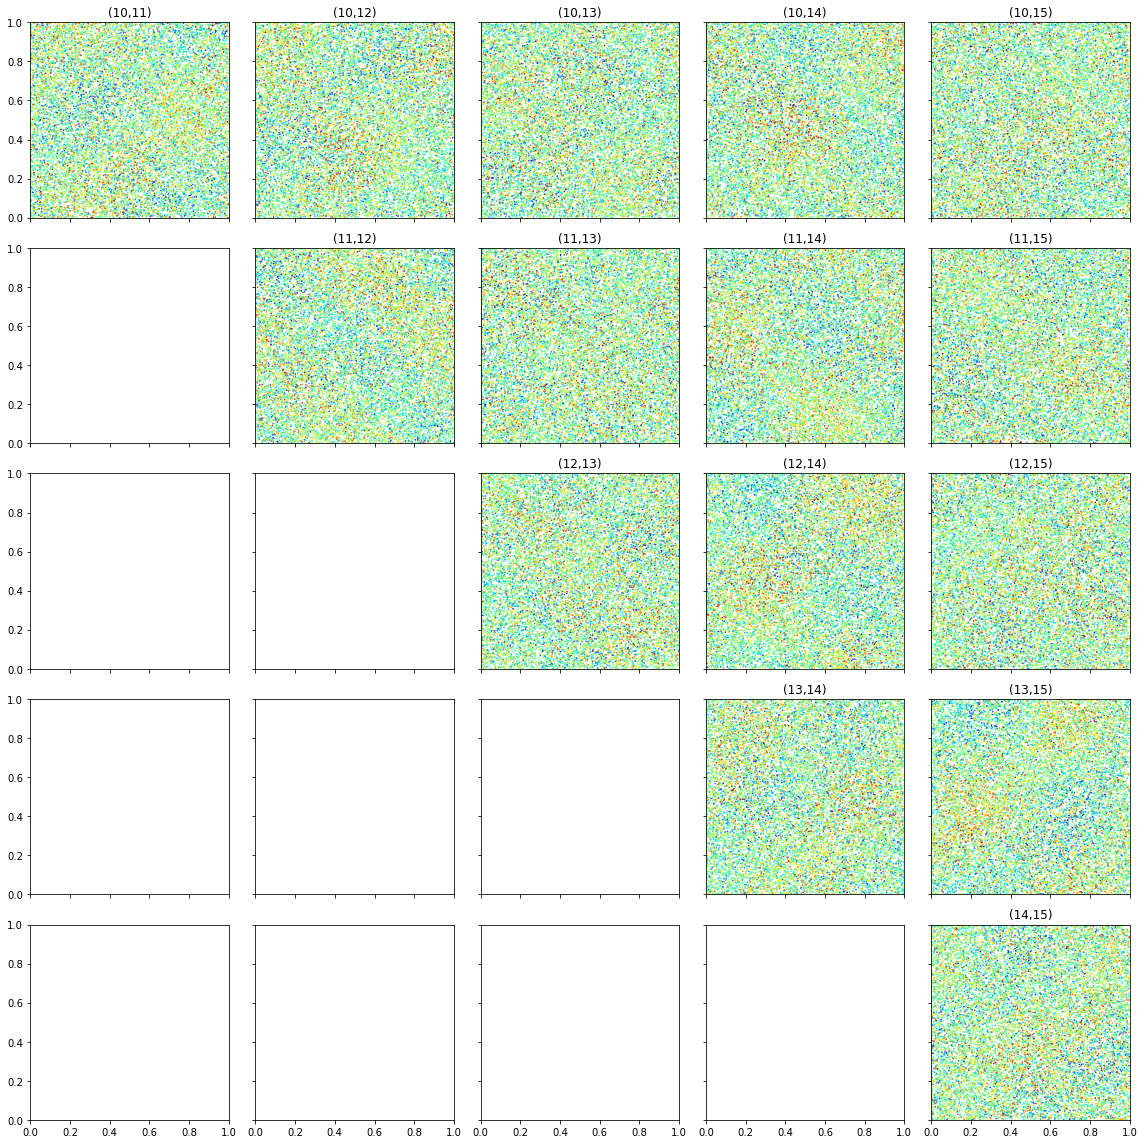

In [4]:
S3 = scramble(S2)
H3 = clusterization(S3.rechunk(heat_chunks))
H3 = np.clip(H3, *heat_clip)
plot_couples(S3, heat=H3, d0=d0)

array([[<AxesSubplot:title={'center':'Mersenne Twister'}>,
        <AxesSubplot:title={'center':'Sobol'}>],
       [<AxesSubplot:title={'center':'Scrambled Sobol'}>, <AxesSubplot:>]],
      dtype=object)

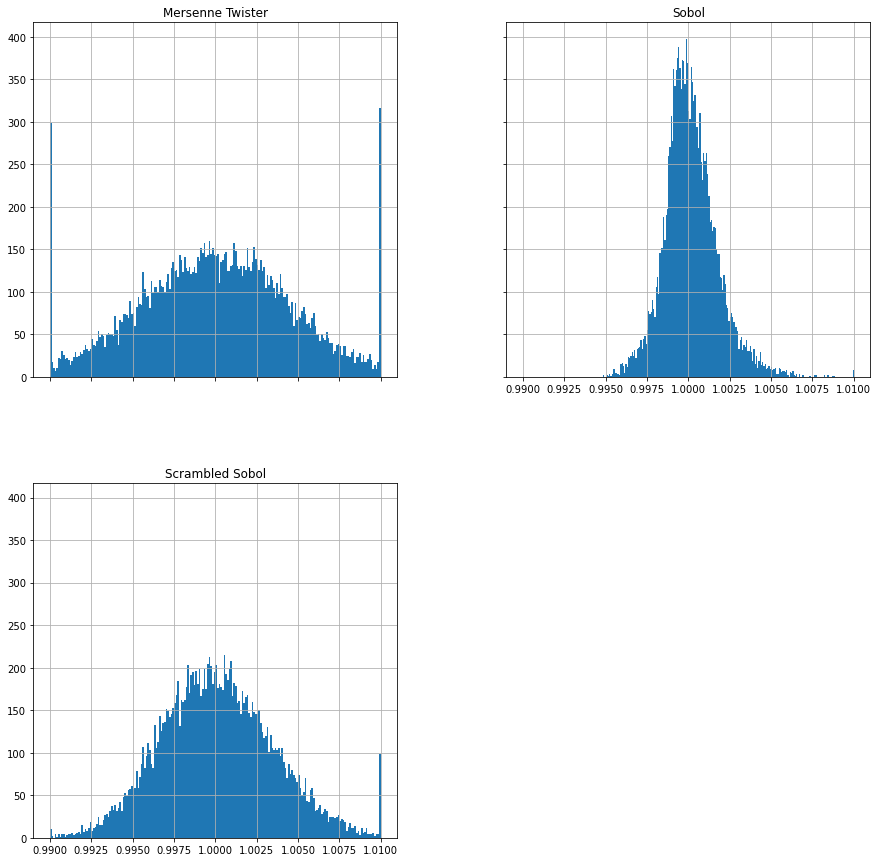

In [5]:
H1c, H2c, H3c = dask.compute(H1, H2, H3)
df = pandas.DataFrame([H1c, H2c, H3c]).T
df.columns = ["Mersenne Twister", "Sobol", "Scrambled Sobol"]
df.hist(bins=200, figsize=(15, 15), sharex=True, sharey=True)